In [1]:
import math
import numpy as np
import pandas as pd

import seaborn as sns
from matplotlib import pyplot

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

import tensorflow as tf
from tensorflow.keras import optimizers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dropout, BatchNormalization, LeakyReLU, Activation
from tensorflow.keras.callbacks import Callback, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from keras.utils import np_utils
import matplotlib.pyplot as plt
import os



Using TensorFlow backend.


In [2]:
df = pd.read_csv('C:/Users/LENOVO/Desktop/fer2013.csv')
print(df.shape)
df.head()

(35887, 3)


,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [3]:
math.sqrt(len(df.pixels[0].split(' ')))

48.0

In [4]:
INTERESTED_LABELS = [3, 4, 6]

In [5]:
df = df[df.emotion.isin(INTERESTED_LABELS)]
df.shape

(21264, 3)

In [6]:
img_array = df.pixels.apply(lambda x: np.array(x.split(' ')).reshape(48, 48, 1).astype('float32'))
img_array = np.stack(img_array, axis=0)

In [7]:
img_array.shape

(21264, 48, 48, 1)

In [8]:
le = LabelEncoder()
img_labels = le.fit_transform(df.emotion)
img_labels = np_utils.to_categorical(img_labels)
img_labels.shape

(21264, 3)

In [9]:
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_name_mapping)

{3: 0, 4: 1, 6: 2}


In [10]:
X_train, X_valid, y_train, y_valid = train_test_split(img_array, img_labels,shuffle=True, stratify=img_labels,test_size=0.1, random_state=42)
X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((19137, 48, 48, 1), (2127, 48, 48, 1), (19137, 3), (2127, 3))

In [11]:
img_width = X_train.shape[1]
img_height = X_train.shape[2]
img_depth = X_train.shape[3]
num_classes = y_train.shape[1]

In [12]:
# Normalizing results, as neural networks are very sensitive to unnormalized data.
X_train = X_train / 255.
X_valid = X_valid / 255.

In [13]:
new_model = tf.keras.models.load_model('model.h5')

In [14]:
new_model.summary()

Model: "DCNN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 48, 48, 64)        1664      
_________________________________________________________________
batchnorm_1 (BatchNormalizat (None, 48, 48, 64)        256       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 48, 48, 64)        102464    
_________________________________________________________________
batchnorm_2 (BatchNormalizat (None, 48, 48, 64)        256       
_________________________________________________________________
maxpool2d_1 (MaxPooling2D)   (None, 24, 24, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 128)       73856  

In [15]:
loss, acc = new_model.evaluate(X_valid, y_valid, verbose=1)
print('Restored model, accuracy: {:5.2f}%'.format(100 * acc))

67/67 [==============================] - 18s 272ms/step - loss: 0.4651 - accuracy: 0.8119
Restored model, accuracy: 81.19%


In [16]:
loss, acc = new_model.evaluate(X_train, y_train, verbose=1)
print('Restored model, accuracy: {:5.2f}%'.format(100 * acc))

599/599 [==============================] - 152s 253ms/step - loss: 0.4117 - accuracy: 0.8307
Restored model, accuracy: 83.07%


In [26]:
mapper = {
    0: "happy",
    1: "sad",
    2: "neutral",
}

objects = ('happy', 'sad', 'neutral')
y_pos = np.arange(len(objects))
print(y_pos)

[0 1 2]


In [27]:
import matplotlib.pyplot as plt
def emotion_analysis(emotions):
    objects = ['happy', 'sad', 'neutral']
    y_pos = np.arange(len(objects))
    plt.bar(y_pos, emotions, align='center', alpha=0.9)
    plt.tick_params(axis='x', which='both', pad=10,width=4,length=10)
    plt.xticks(y_pos, objects)
    plt.ylabel('percentage')
    plt.title('emotion')
    
plt.show()

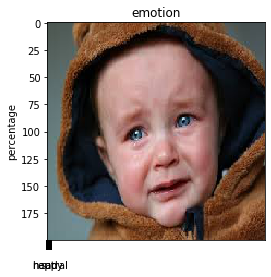

Expression Prediction: sad


In [35]:
from skimage import io
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

img = image.load_img('./test1.jpg', color_mode = "grayscale", target_size=(48, 48))
show_img=image.load_img('./test1.jpg', target_size=(200, 200))
x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)

x /= 255

custom = new_model.predict(x)
#print(custom[0])
emotion_analysis(custom[0])

x = np.array(x, 'float32')
x = x.reshape([48, 48]);

plt.gray()
plt.imshow(show_img)
plt.show()

m=0.000000000000000000001
a=custom[0]
for i in range(0,len(a)):
    if a[i]>m:
        m=a[i]
        ind=i
        
print('Expression Prediction:',objects[ind])


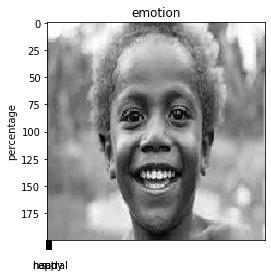

Expression Prediction: happy


In [36]:
from skimage import io
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

img = image.load_img('./test2.jpg', color_mode = "grayscale", target_size=(48, 48))
show_img=image.load_img('./test2.jpg', target_size=(200, 200))
x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)

x /= 255

custom = new_model.predict(x)
#print(custom[0])
emotion_analysis(custom[0])

x = np.array(x, 'float32')
x = x.reshape([48, 48]);

plt.gray()
plt.imshow(show_img)
plt.show()

m=0.000000000000000000001
a=custom[0]
for i in range(0,len(a)):
    if a[i]>m:
        m=a[i]
        ind=i
        
print('Expression Prediction:',objects[ind])
